# Исследование стартапов

## Цель и задачи  

**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы как о предобработке, так и о значении данных для бизнеса. 

**Задачи, требующие ответов:**
1. По каким столбцам можно объединять данные из разных таблиц;
2. Можно ли доверять данным о сотрудниках стартапов и их образовании;
3. Что значат покупки за 0 или за 1 доллар;
4. Какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
5. Как рассчитать и отобразить численные показатели и динамику.

## Данные

Данные для анализа содержат пять основных датасетов

- `acquisition.csv` - информация о покупках одними компаниями других компаний;
- `company_and_rounds.csv` - информация о компаниях и раундах финансирования;
- `education.csv` - информация об образовании сотрудника;
- `people.csv` - информация о сотрудниках;
- `degrees.csv` - информация о типе образования сотрудника.

Помимо основных, есть две таблицы не требующиеся для выполнения проекта, но связанные с исследуемыми данными:

- `fund.csv` - информация о фондах;
- `investment.csv` - информация о раундах инвестирования.

## Структура проекта

1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ объединённых таблиц.
4. Итоговый вывод и рекомендации.

## 1. Знакомство с данными: загрузка и первичная предобработка.

### 1.1. Вывод общей информации, исправление названия столбцов

Начнём с загрузки библиотек и датасетов `acquisition`, `company_and_rounds`, `education`, `people` и `degrees`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn. Данные датасетов сохраним в переменных: `acquisition_df`, `company_and_rounds_df`, `education_df`, `people_df` и `degrees_df`.

In [4]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для дальнейшей визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Выгружаем данные в переменные
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

Познакомимся с данными датасета `company_and_rounds.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [7]:
# Выводим первые строки датафрейма на экран
pd.set_option('display.max.columns', 22)
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Таким же образом загрузим остальные датасеты:

In [10]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [11]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [12]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [13]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [14]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [15]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [16]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [17]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `company_and_rounds.csv` является самым объемным и содержит 22 столбца и 217773 строки, в которых представлена информация о компаниях и раундах финансирования. 

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в первом датафрейме некорректны, их необходимо привести к snake case, однако в датасете `company_and_rounds` есть столбцы с идентичным названием: `company  ID` и `company  id` - приведение их к единообразию приведет к тому, что они получат одинаковое название;
- Типы данных в некоторых столбцах указаны неверно. Например, столбцы `founded  at`, `closed  at`, `funded  at` и `acquired_at` представлены типом `object`, но характер хранящихся в них данных предполагает использование типа данных свойственного датам. Также можно провести понижение разрядности для оптимизации использования памяти.
- В большинстве столбцов содержатся пропущенные значения. Большой объем пропусков может привести к трудностям при анализе данных. 

Чтобы привести названия столбцов к snake_case, необходимо все заглавные символы сделать строчными, а между словами добавить подчёркивание _.

In [20]:
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID': 'company_id_1',
                        'company  id': 'company_id_2'})
company_and_rounds_df.columns = [x.lower().replace('  ', '_') for x in company_and_rounds_df.columns.values]
company_and_rounds_df.columns

Index(['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

### 1.2. Смена типов и анализ пропусков

Для начала предстоит обработать типы данных в столбцах, содержащих значения даты и времени.

In [23]:
# Меняем тип данных с помощью метода to_datetime()
for column in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds_df[column] = pd.to_datetime(company_and_rounds_df[column]) 
print(company_and_rounds_df.dtypes) 

company_id_1                  float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_2                  float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object


In [24]:
# Меняем тип данных в остальных датафреймах
for column in ['acquired_at']:
    acquisition_df[column] = pd.to_datetime(acquisition_df[column]) 
print(acquisition_df.dtypes)

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object


In [25]:
for column in ['graduated_at']:
    education_df[column] = pd.to_datetime(education_df[column]) 
print(education_df.dtypes)

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object



При первичном знакомстве было обнаружено большое количество пропусков в столбцах датафреймов. Узнаем абсолютное и относительное количество пропусков и сделаем вывод о полноте данных.

In [27]:
company_and_rounds_df.isna().mean().sort_values()

company_id_1           0.001387
milestones             0.001387
funding_total          0.001387
investment_rounds      0.001387
funding_rounds         0.001387
status                 0.001387
name                   0.001391
domain                 0.324258
category_code          0.339288
founded_at             0.495091
country_code           0.501286
network_username       0.561316
funding_round_id       0.756959
participants           0.756959
pre_money_valuation    0.756959
raised_amount          0.756959
is_last_round          0.756959
company_id_2           0.756959
is_first_round         0.756959
funding_round_type     0.756959
funded_at              0.758098
closed_at              0.984162
dtype: float64

Доля пропущенных данных в отдельных столбцах достигает 98%. Больше половины столбцов имееют свыше 50% пропусков.

In [29]:
acquisition_df.isna().mean().sort_values()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
price_amount            0.000000
acquired_at             0.003083
term_code               0.805358
dtype: float64

В данном датафрейме большое количество пропусков (80%) имеет лишь один столбец - 'Варианты расчета'.

In [31]:
education_df.isna().mean().sort_values()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

Данные в представленном датафрейме полны за исключением последнего столбца (47% пропусков), хранящего информацию о дате получения образования.

In [33]:
people_df.isna().mean().sort_values()

id                  0.000000
last_name           0.000018
first_name          0.000040
network_username    0.828560
company_id          0.847315
dtype: float64

Большое количество пропусков (свыше 80%) в столбцах, содежащих идентификатор компании и ник сотрудника в социальных сетях.

In [35]:
degrees_df.isna().mean().sort_values()

id             0.000000
object_id      0.000000
degree_type    0.102372
subject        0.258298
dtype: float64

Значения количества пропусков в данном датафрейме сравнительно невелики и находятся в пределах 10-25%.

Большое количество пропусков в данных может нести в себе сложности для анализа. Заменить такое большое количество пропусков будет некорректно, однако часть мы можем попробовать восполнить из аналогичных столбцов, а часть и вовсе может не пригодиться для достижения поставленных целей исследования.

## 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

Создадим сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года укажем:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.

In [41]:
# Преобразуем столбец funded_at в формат datetime и выделим год
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])
company_and_rounds_df['year'] = company_and_rounds_df['funded_at'].dt.year

# Сгруппируем данные по годам
pivot_table = company_and_rounds_df.groupby('year').agg(
    typical_raised_amount=('raised_amount', 'median'),  # Медиана суммы финансирования
    total_rounds=('raised_amount', 'count')  # Количество раундов
).reset_index()

# Фильтруем только те годы, где было более 50 раундов финансирования
pivot_table = pivot_table[pivot_table['total_rounds'] > 50]

print(pivot_table)

      year  typical_raised_amount  total_rounds
15  1999.0              2000000.0            76
16  2000.0              4200000.0           125
17  2001.0              3000000.0            96
18  2002.0              4200000.0           116
19  2003.0              3000000.0           159
20  2004.0              5000000.0           291
21  2005.0              5500000.0          1633
22  2006.0              5000000.0          2436
23  2007.0              3973320.0          3279
24  2008.0              3110000.0          3774
25  2009.0              2000000.0          4151
26  2010.0              1602500.0          6221
27  2011.0              1200000.0          9204
28  2012.0              1000000.0          9970
29  2013.0              1200000.0         11072


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

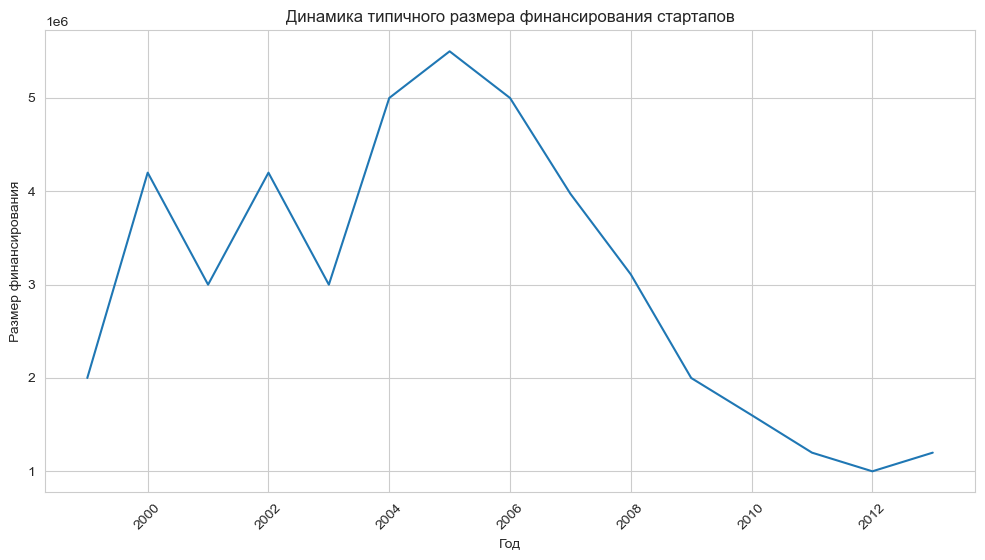

In [43]:
# Построение графика
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, x='year', y='typical_raised_amount')

plt.xlabel("Год")
plt.ylabel("Размер финансирования")
plt.title("Динамика типичного размера финансирования стартапов")
plt.xticks(rotation=45)

plt.show()

На основе полученных данных можно сделать следующие выводы:
1. Максимальный типичный размер собранных в рамках одного раунда средств был зафиксирован в 2005 году;
2. В 2013 году наблюдалась тенденция роста количества раундов и выделяемых в рамках каждого раунда средств. Более того, это первый год, начиная с 2005, в котором зафиксирована положительная динамика.

### 2.2. Люди и их образование

Здесь необходимо ответить на вопрос: зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний?

In [47]:
people_df['has_education_info'] = people_df['id'].isin(education_df['person_id'])

# Подсчет количества сотрудников и их данных об образовании в каждой компании
company_stats = people_df.groupby('company_id').agg(
    total_employees=('id', 'count'),
    employees_with_education=('has_education_info', 'sum')
).reset_index()

# Доля сотрудников без информации об образовании
company_stats['share_no_education'] = 1 - (company_stats['employees_with_education'] / company_stats['total_employees'])

# Определение групп по количеству сотрудников
bins = [0, 2, 10, 50, 200, company_stats['total_employees'].max()]
labels = ['1', '2-10', '11-50', '51-200', '200+']
company_stats['size_group'] = pd.cut(company_stats['total_employees'], bins=bins, labels=labels, right=True)

# Рассчитываем среднюю долю сотрудников без информации об образовании в каждой группе
grouped_stats = company_stats.groupby('size_group')['share_no_education'].mean()

print(grouped_stats)

size_group
1         0.463051
2-10      0.498834
11-50     0.439512
51-200    0.285165
200+      0.311475
Name: share_no_education, dtype: float64


C:\Users\Kate\AppData\Local\Temp\ipykernel_12440\1371715086.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = company_stats.groupby('size_group')['share_no_education'].mean()


Компании были разделены на маленькие (в их числе компании, состоящие из 1 сотрудника, и компании до 10 сотрудников), средние (до 50 сотрудников), крупные (до 200 сотрудников) и очень крупные (свыше двухсот сотрудников). Подробное деление направлено на выделение закономерности.

На основании полученных данных можно сделать вывод о том, что наибольшую среднюю долю сотруников без информации об образовании имеют маленькие компании (до 50%). Чем крупнее компания, тем полнее данные об образовании.

Возможно присоединить к данным датафрейма `education_df` датафрейм `degrees_df`, однако для этого необходимо провести преобразование столбца `object_id`:

In [50]:
# Удаляем "p:"
degrees_df['object_id'] = degrees_df['object_id'].str.replace("p:", "", regex=False)
display(degrees_df)

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering


Теперь можно провести присоединение, используя метод merge()

### 2.3. Объединять или не объединять — вот в чём вопрос

Необходимо установить, подходит ли для объединения данных столбец network_username, который встречается в датасетах `company_and_rounds` и `people`. Для этого проверим столбцы на повторяющиеся значения:

In [54]:
# Проверяем количество уникальных значений network_username
print("Уникальные значения network_username в company_and_rounds_df:", company_and_rounds_df['network_username'].nunique())
print("\nУникальные значения network_username в people_df:", people_df['network_username'].nunique())

# Проверяем количество повторяющихся значений в столбцах датафреймов
common_usernames = set(company_and_rounds_df['network_username']).intersection(set(people_df['network_username']))
print("\nКоличество совпадающих network_username:", len(common_usernames))

# Доля совпадающих значений
overlap_ratio = len(common_usernames) / people_df['network_username'].nunique()
print("Доля совпадений:", overlap_ratio)


Уникальные значения network_username в company_and_rounds_df: 79571

Уникальные значения network_username в people_df: 38421

Количество совпадающих network_username: 2200
Доля совпадений: 0.05726035241144166


Поскольку доля совпадающих значений очень мала (ниже 6%), использовать данные столбцы для объединения не стоит.

### 2.4. Проблемный датасет и причина возникновения пропусков

Еще раз обратимся к датасету `company_and_rounds.csv`:

In [58]:
display(company_and_rounds_df)

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


Сложность для анализа в нем представляет большое количество пропусков.
На данном этапе необхоимо:

- Привести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.
- Максимальным образом сохраняя данные, подготовить их так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Известно, что в данном датасете дублируются столбцы, содержащие идентификатор компании. Ранее мы увидели, что количество пропусков у столбцов начиная с `company_id_2`, примерно равное. На основании этого мы можем сделать вывод, что две таблицы ранее были объединены по данному идентификатору, и для удобства дальнейшей работы их следует разделить.

In [60]:
#Делаем отдельную таблицу по компаниям
df_company = company_and_rounds_df[['company_id_1', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']]

company_and_rounds_df['funded_year'] = pd.to_datetime(company_and_rounds_df['funded_at']).dt.year

#Убираем дубли записей
df_company=company_and_rounds_df.drop_duplicates(subset=['company_id_1', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')
#Делаем отдельную таблицу по раундам инвестирования
df_rounds = company_and_rounds_df[['company_id_1', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'funded_year']]
#Смоторим пропуски
display(df_rounds[df_rounds['funding_round_type'].isna()].head()) 

#Убираем пропуски по колонке
df_rounds=df_rounds.dropna(subset=['funding_round_type'])


,company_id_1,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
3,10.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#Таблица по компаниям
display(df_company)

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0,2005.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,...,2318.0,3429.0,2006-08-28,series-c+,20000000.0,0.0,7.0,0.0,0.0,2006.0,2006.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,...,2836.0,7748.0,2008-01-31,angel,1300000.0,0.0,8.0,1.0,1.0,2008.0,2008.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,...,12687.0,43233.0,2010-03-05,angel,500000.0,0.0,2.0,0.0,1.0,2010.0,2010.0


In [62]:
#Таблица по раундам инвестирования
display(df_rounds)

,company_id_1,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0,2005.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0,2007.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0,2008.0
15,1001.0,5000000.0,1644.0,2008-02-26,series-a,0.0,3.0,1.0,1.0,2008.0
20,10014.0,0.0,6682.0,2008-09-01,angel,0.0,1.0,1.0,1.0,2008.0
...,...,...,...,...,...,...,...,...,...,...
217769,NaN,5500000.0,56454.0,2011-01-31,other,0.0,0.0,1.0,1.0,2011.0
217770,NaN,10633300.0,56542.0,2011-01-13,venture,0.0,0.0,0.0,1.0,2011.0
217771,NaN,2125720.0,56543.0,2012-05-31,venture,0.0,0.0,1.0,0.0,2012.0
217772,NaN,3602480.0,56928.0,2013-12-03,venture,0.0,5.0,1.0,1.0,2013.0


Теперь таблицы по компаниям и раундам инвестирования оформлены и могут быть использованы для анализа.

## 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных

Из полученного набора данных компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования может означать потенциальный интерес к покупке или продаже компании.

In [67]:
# Фильтрация данных
filtered_df = df_company[
    (df_company['funding_rounds'] > 0) |
    (df_company['investment_rounds'] > 0) |
    (df_company['status'] == 'acquired')
]

# Вывод отфильтрованного датафрейма
display(filtered_df)

# Вывод количества таких компаний
print("Количество таких компаний:", len(filtered_df))

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0,2005.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,...,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008.0,2008.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,...,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,2008.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,...,960.0,1344.0,2007-11-01,series-a,10000000.0,0.0,8.0,1.0,1.0,2007.0,2007.0
217459,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,...,26607.0,142181.0,2010-06-10,angel,500000.0,0.0,1.0,1.0,1.0,2010.0,2010.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,...,2318.0,3429.0,2006-08-28,series-c+,20000000.0,0.0,7.0,0.0,0.0,2006.0,2006.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,...,2836.0,7748.0,2008-01-31,angel,1300000.0,0.0,8.0,1.0,1.0,2008.0,2008.0


Количество таких компаний: 40747


В результате мы получили свыше 40 тысяч компаний. Далее будем работать с этим массивом данных.

### 3.2. Анализ выбросов

Проанализируем наиболее типичный для рассматриваемого периода размер средств, который предоставлялся компаниям, и исследуем выбивающиеся значения.

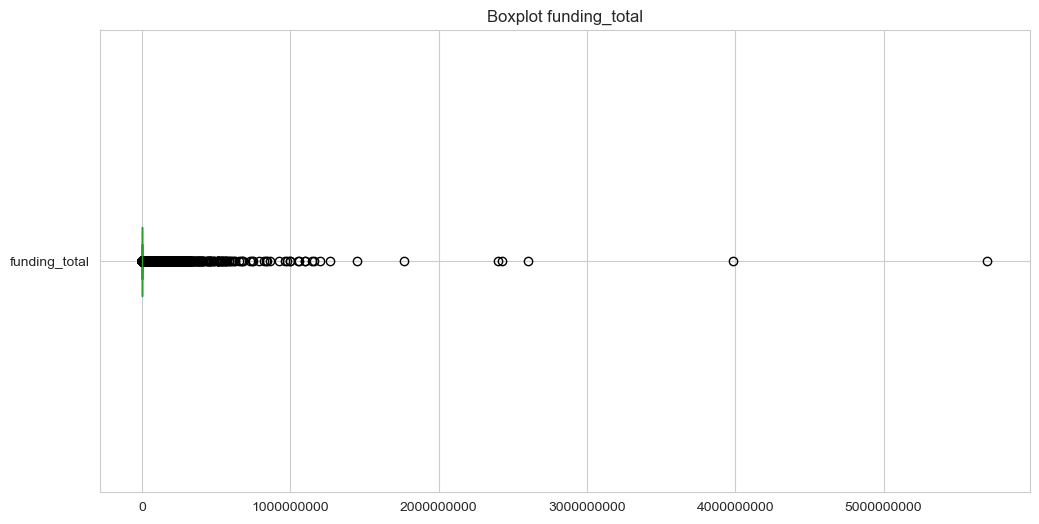

In [71]:
plt.figure(figsize=(12, 6))

#Строим ящик с усами
df_company.boxplot(column='funding_total', vert=False)
plt.title("Boxplot funding_total")
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Поскольку данные имеют большой разброс, мы можем более наглядно рассмотреть их, добавив логарифмическую шкалу для гимстограммы:

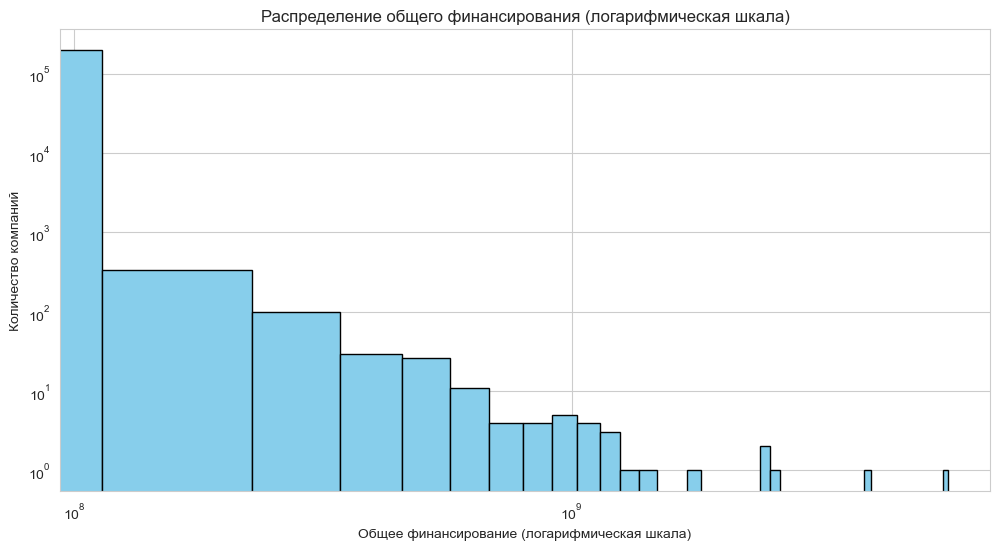

In [73]:
    plt.figure(figsize=(12, 6))
    plt.hist(df_company['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
    plt.xscale('log')  # Логарифмическая шкала по оси X
    plt.xlabel('Общее финансирование (логарифмическая шкала)')
    plt.ylabel('Количество компаний')
    plt.title('Распределение общего финансирования (логарифмическая шкала)')
    plt.show()

Согласно построенному графику, большинство значений лежит на уровне 0. Анализируя оставшиеся данные, можно прийти к выводу, что наибольшая часть значений находится в области до 1000000000. Посмотрим на статистичческие данные, используя метод describe()

In [75]:
describe_stats = df_company['funding_total'].describe()
pd.options.display.float_format = '{:.2f}'.format
print(describe_stats)

count       196553.00
mean       2101192.48
std       26034847.10
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     5700000000.00
Name: funding_total, dtype: float64


Можно заметить, что свыше 75% данных имеют показатель суммы финансирования равный 0. При этом максимальная сумма достигает 5700000000. Такое распределение можно считать не вполне типичным, поэтому стандартное выделение среднего значения и медианы этому набору данных не подходит.

### 3.3. Куплены забесплатно?

Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования

In [79]:
# Объединение таблиц
df_merged = df_company.merge(acquisition_df, left_on='company_id_1', right_on='acquiring_company_id', how='left')

# Фильтрация: проданы за 0 или 1 доллар, но имели ненулевое финансирование
sold_for_free = df_merged[(df_merged['price_amount'].isin([0, 1])) & (df_merged['funding_total'] > 0)]

display(sold_for_free)

,company_id_1,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,...,participants,is_first_round,is_last_round,year,funded_year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
51,100331.00,Solectria Renewables,cleantech,operating,NaT,NaT,solren.com,SolectriaRen,USA,0.00,1.00,...,1.00,1.00,1.00,2011.00,2011.00,6895.00,100331.00,152557.00,NaN,0.00,2012-03-20
111,100844.00,Attunity,software,ipo,NaT,NaT,attunity.com,attunity,USA,0.00,4.00,...,1.00,1.00,0.00,2011.00,2011.00,6113.00,100844.00,100840.00,NaN,0.00,2011-09-07
126,100938.00,The Local,news,operating,2004-04-01,NaT,thelocal.com,NaN,SWE,0.00,3.00,...,2.00,0.00,1.00,2007.00,2007.00,6114.00,100938.00,100937.00,NaN,0.00,2008-12-01
172,10120.00,MetaPack,software,operating,1999-01-01,NaT,metapack.com,MetaPack,GBR,0.00,2.00,...,2.00,0.00,1.00,2006.00,2006.00,10519.00,10120.00,285956.00,NaN,0.00,2013-12-11
261,10176.00,Yammer,enterprise,acquired,2008-09-10,NaT,yammer.com,yammer,USA,0.00,5.00,...,2.00,0.00,1.00,2009.00,2009.00,6978.00,10176.00,25170.00,NaN,0.00,2012-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200990,12.00,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.00,8.00,...,10.00,0.00,1.00,2007.00,2007.00,8611.00,12.00,117101.00,NaN,0.00,2013-05-13
200991,12.00,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.00,8.00,...,10.00,0.00,1.00,2007.00,2007.00,8927.00,12.00,79120.00,NaN,0.00,2013-06-19
200992,12.00,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.00,8.00,...,10.00,0.00,1.00,2007.00,2007.00,9286.00,12.00,1143.00,NaN,0.00,2013-08-13
200993,12.00,Network,social,ipo,2006-03-21,NaT,network.com,network,USA,0.00,8.00,...,10.00,0.00,1.00,2007.00,2007.00,9512.00,12.00,3614.00,NaN,0.00,2013-08-28


In [80]:
unique_sold_for_free = sold_for_free['company_id_1'].nunique()
print(unique_sold_for_free)

1263


В результате мы получили 1263 компании.

Посмотрим на то, компаний в каком статусе и в какой категории в данной выборке больше всего:

In [82]:
group_status = sold_for_free.groupby('status')['company_id_1'].count().reset_index()
display(group_status)

,status,company_id_1
0,acquired,304
1,closed,39
2,ipo,857
3,operating,1367


In [83]:
group_category = sold_for_free.groupby('category_code')['company_id_1'].count().sort_values()
display(group_category)

category_code
design                1
nanotech              1
legal                 1
sports                2
automotive            4
pets                  4
photo_video           6
medical               6
fashion               6
nonprofit             7
transportation        7
manufacturing         8
messaging            10
real_estate          12
health               13
music                13
hospitality          15
consulting           20
education            21
semiconductor        24
finance              26
public_relations     30
travel               34
other                35
analytics            40
cleantech            46
hardware             56
security             60
biotech              61
news                 64
social               94
search              117
mobile              124
ecommerce           140
games_video         158
advertising         161
network_hosting     202
enterprise          211
software            336
web                 360
Name: company_id_1, dtype:

Наибольшее количество компаний находятся в статусе `operating` и принадлежат категориям `web`, `software` и `enterprise`.

Теперь необходимо рассчитать верхнюю и нижнюю границу выбросов для столбца `funding_total` и посмотреть, каким процентилям соответствуют их границы.

In [85]:
# Вычисляем квартили Q1 и Q3
Q1 = df_company['funding_total'].quantile(0.25)
Q3 = df_company['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний и нижний порог для выбросов
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 + 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')
print(f'Нижний порог выбросов: {lower_bound}')

Верхний порог выбросов: 0.0
Нижний порог выбросов: 0.0


In [86]:
# Определяем процентили для границ
upper_percentile = (df_company['funding_total'] > upper_bound).mean() * 100
lower_percentile = (df_company['funding_total'] < lower_bound).mean() * 100
print(f"Процент данных выше верхней границы: {upper_percentile:.2f}%")
print(f"Процент данных ниже нижней границы: {lower_percentile:.2f}%")

Процент данных выше верхней границы: 14.18%
Процент данных ниже нижней границы: 0.00%


### 3.4. Цены стартапов по категориям

Среди категорий стартапов необходимо выделить категории, характеризующиеся:
- типично высокими ценами;
- наибольшим разбросом цен за стартап.

In [89]:
import numpy as np
#Сгруппируем данные по категориям 
category_stats = df_merged.groupby('category_code')['price_amount'].agg(
    mean_price='mean', 
    median_price='median',
    std_dev='std',
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75)
).reset_index()

# Выбираем категории с высокими ценами (по медиане)
high_price_categories = category_stats.sort_values(by='median_price', ascending=False).head(3)

# Выбираем категории с наибольшим разбросом (по стандартному отклонению или IQR)
high_variance_categories = category_stats.sort_values(by='std_dev', ascending=False).head(5)

# Вывод результатов
print("Категории с типично высокими ценами:")
display(high_price_categories[['category_code', 'median_price']])

print("Категории с наибольшим разбросом цен:")
display(high_variance_categories[['category_code', 'std_dev']])

Категории с типично высокими ценами:


,category_code,median_price
18,local,486000000.00
3,biotech,9125000.00
35,semiconductor,225000.00


Категории с наибольшим разбросом цен:


,category_code,std_dev
9,enterprise,100594813116.75
22,mobile,3249037590.76
11,finance,3084957585.36
32,real_estate,1610243545.45
3,biotech,1535770346.14


Для расчета топа были выбраны стандартные стаитстичческие показатели. Опираясь на обе таблицы, удалось установить, что в них особо выделяются первые три строчки: показатели в них значительно превышают показатели последующих строк. В таблицах обнаружено пересечение: категория `biotech`, представленная как в списке категорий с типично высокими ценами (медиана - 9125000.00) , так и в категории с наибольшим разбросом цен (параметр отклонения - 1535770346.14).

### 3.5. Сколько раундов продержится стартап перед покупкой

Необходимо проанализировать столбец `funding_rounds` и исследовать значения столбца, а именно типичное значение количества раундов для каждого возможного статуса стартапа.

In [93]:
df_company_filtered = df_company[
    (df_company['funding_rounds'] > 0)
]

funding_stats = df_company_filtered.groupby('status')['funding_rounds'].median().reset_index()

print("Типичное количество раундов для каждого статуса стартапа:")
display(funding_stats)

Типичное количество раундов для каждого статуса стартапа:


,status,funding_rounds
0,acquired,1.00
1,closed,1.00
2,ipo,2.00
3,operating,1.00


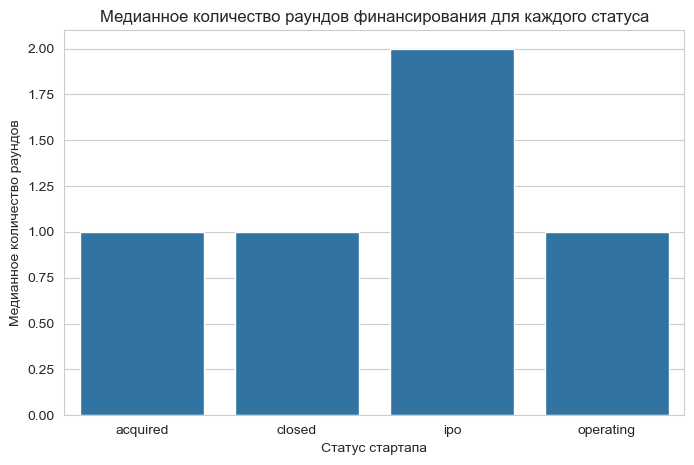

In [94]:
funding_stats = df_company_filtered.groupby('status')['funding_rounds'].median().reset_index()

# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(x='status', y='funding_rounds', data=funding_stats)

# Подписи
plt.xlabel("Статус стартапа")
plt.ylabel("Медианное количество раундов")
plt.title("Медианное количество раундов финансирования для каждого статуса")

# Отображаем график
plt.show()

Таким образом, медианное количество раундов финансирования выше у стартапов в статусе 'closed'. У компаний в других статусах медианное количество раундов финансирования минимально.

Наибольшим медианным количеством раундов финансирования обладают компании в статусе 'Первичное публичное предложение'.

## 4. Итоговый вывод и рекомендации

В ходе исследования была проведена работа с базой данных, содержащей информацию о компаниях, раундах финансирования,покупках одних компаний другими и сотрудниках. Основными исследуемыми показателями стали: даты инвестирования, количество раундов финансирования, сумма финансирования, стоимость продажи.

Было установлено:
1. Данные из таблиц можно не только объединять, но и разделять для удобства дальнейшей работы: так из датафрейма с большим количеством пропусков и плохо прослеживаемой структурой `company_and_rounds_df` были выделены два датафрейма `df_company` и `df_rounds`;
2. Данные о сотрудниках стартапов и их образовании неполны, однако по ним можно отследить тенденцию, что чем крупнее компания, тем лучше представлена информация об образовании;
3. Большинство покупок за 0 или за 1 доллар относятся к действующим компаниям и принадлежат категориям `web`, `software` и `enterprise`;
4. Цена стартапов сильно разнится в зависимости от категории: лидерами являются `local`	(486000000.00), `biotech` (9125000.00) и `semiconductor` (225000.00);
5. Для описания статистических показателей были использованы стандартные методы, в том числе метод `describe()` и расчет границ выбросов.

Таким образом, цель проекта - подготовка датасета и проверка корректности данных для решения задач - была достигнута. 

Можно предложить следующие рекомендации:

1. Присматриваться к компаниям, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования может означать потенциальный интерес к покупке или продаже компании;

2. Можно порекомендовать более пристально оценивать категории стартапов, поскольку зачастую они сильно влияют на стоимость продажи и разброс цен;

3. Также стоит уделять внимание рисковым с точки зрения инвестиций стартапам: это стартапы с ненулевым финансированием и стоимостью продажи в 1 или 0 долларов. Наиболее частотные категории и статусы таких стартапов также выделены в исследовании;

4. Оценивать типичную стоимость и количество раундов финансирования в контексте общих тенденций, обращая внимание на значения-выбросы.